In [33]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [34]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("/Users/vrindapatel/Desktop/credit-risk-classification/Resources/lending_data.csv")


# Review the DataFrame
loans_data_encoded_df = pd.read_csv(file_path)
loans_data_encoded_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [35]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = loans_data_encoded_df["loan_status"]

# Separate the X variable, the features
X = loans_data_encoded_df.drop(columns="loan_status")

In [36]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [37]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [38]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [39]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [40]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

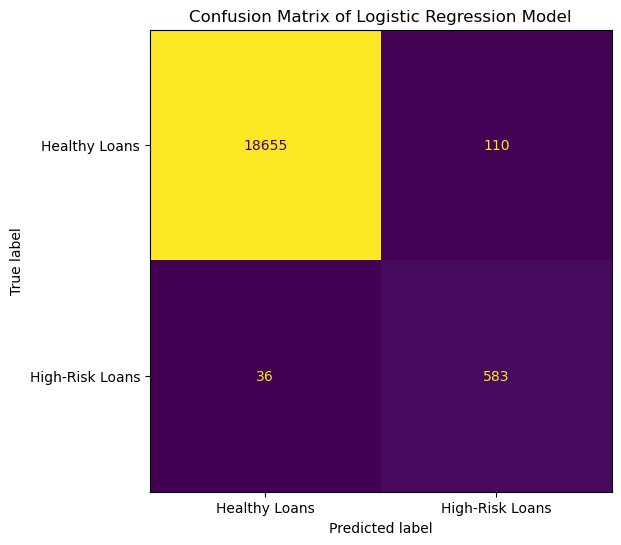

In [41]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

from sklearn.metrics import  ConfusionMatrixDisplay
# create confusion matrix from predictions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred,  
    ax=ax,
    display_labels=["Healthy Loans", "High-Risk Loans"], 
    colorbar=False
)
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()

In [42]:
# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model performs very well in predicting both 0 (healthy loan) and 1 (high-risk loan) labels. Here’s a breakdown of the performance metrics:

Precision:
For 0 (healthy loan): 1.00
For 1 (high-risk loan): 0.84

Recall:
For 0 (healthy loan): 0.99
For 1 (high-risk loan): 0.94

F1-Score:
For 0 (healthy loan): 1.00
For 1 (high-risk loan): 0.89

Overall Accuracy: 0.99

The model has a high overall accuracy of 99%, indicating it correctly predicts the loan status for the vast majority of cases. The precision and recall for the 0 label are both very high, meaning the model is excellent at identifying healthy loans. For the 1 label, the precision is slightly lower but still strong, and the recall is quite high, indicating the model is good at identifying high-risk loans, though it may have some false positives.

---